![imagenes](logo.png)

In [1]:
import pandas as pd
import numpy as np
from siuba import *
from siuba.dply.vector import *
from plotnine import *
import os

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
vuelos = pd.read_csv("C:\\Users\\Usuario\\Documents\\scidata\\24_cdd_py\\practicas\\aerolineas\\flights.csv")

## Ejercicio 1: Análisis de Eficiencia en Tiempos de Vuelo

Una aerolínea está interesada en analizar la eficiencia de sus vuelos en términos de tiempo en el aire (air_time). Quieren entender cómo se distribuyen los tiempos de vuelo para optimizar las rutas y reducir el consumo de combustible.

Visualiza la distribución de los tiempos de vuelo de todos los vuelos que salieron de Nueva York en 2013.

C:\Users\Usuario\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 212'. Pick better value with 'binwidth'.


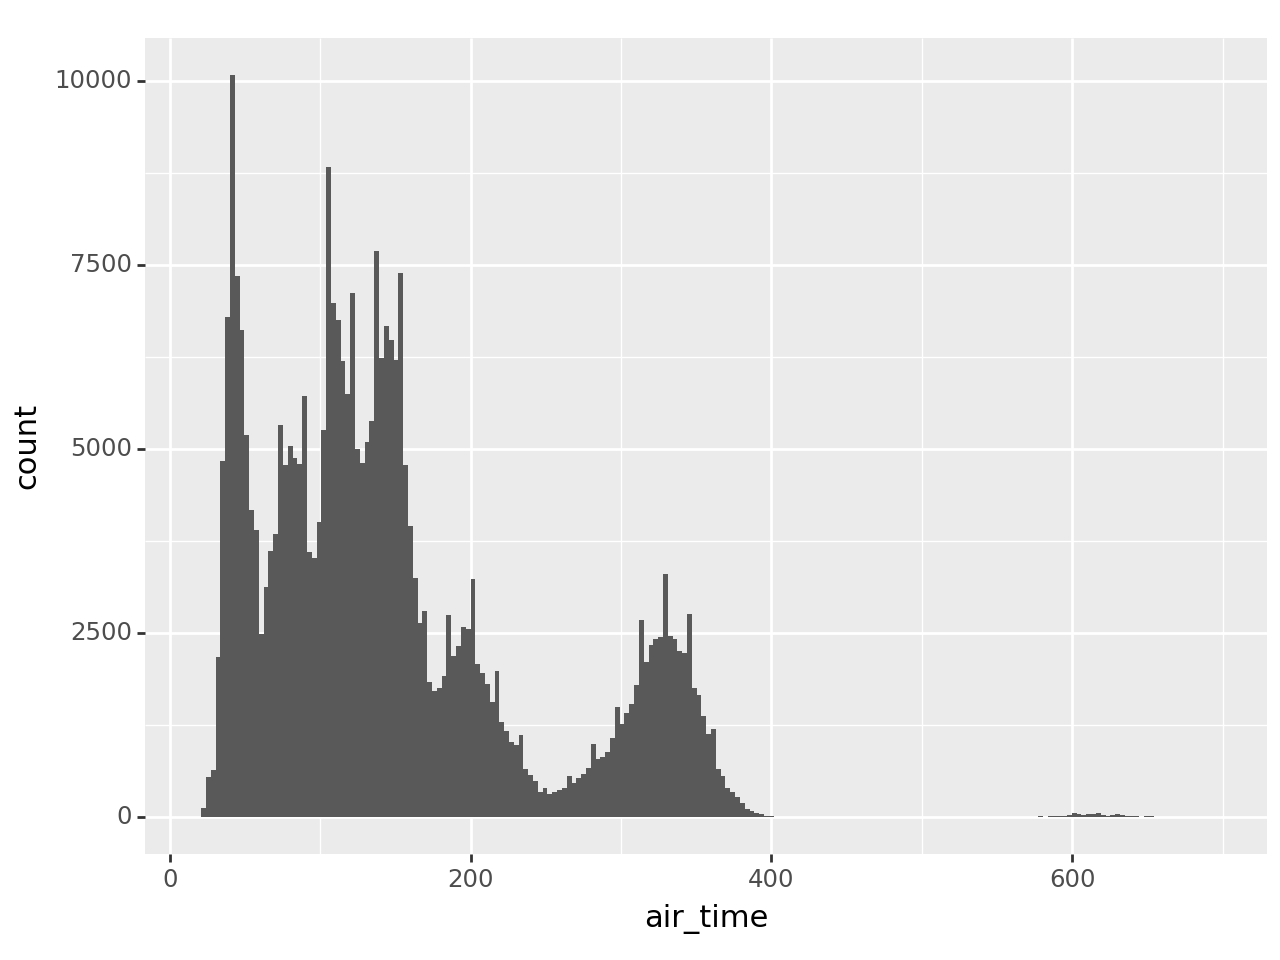

<Figure Size: (640 x 480)>

In [23]:
vuelos_duracion_conicida = vuelos >> filter(~_.air_time.isna())

ggplot(data=vuelos_duracion_conicida) + geom_histogram(mapping=aes(x="air_time"))

In [24]:
vuelos_duracion_conicida >> summarize(duracion_min = _.air_time.min(), duracion_max = _.air_time.max())

,duracion_min,duracion_max
0,20.0,695.0


In [25]:
intervalos = [0,60,120,180,240,300,360,420,480,540,600,660,720]

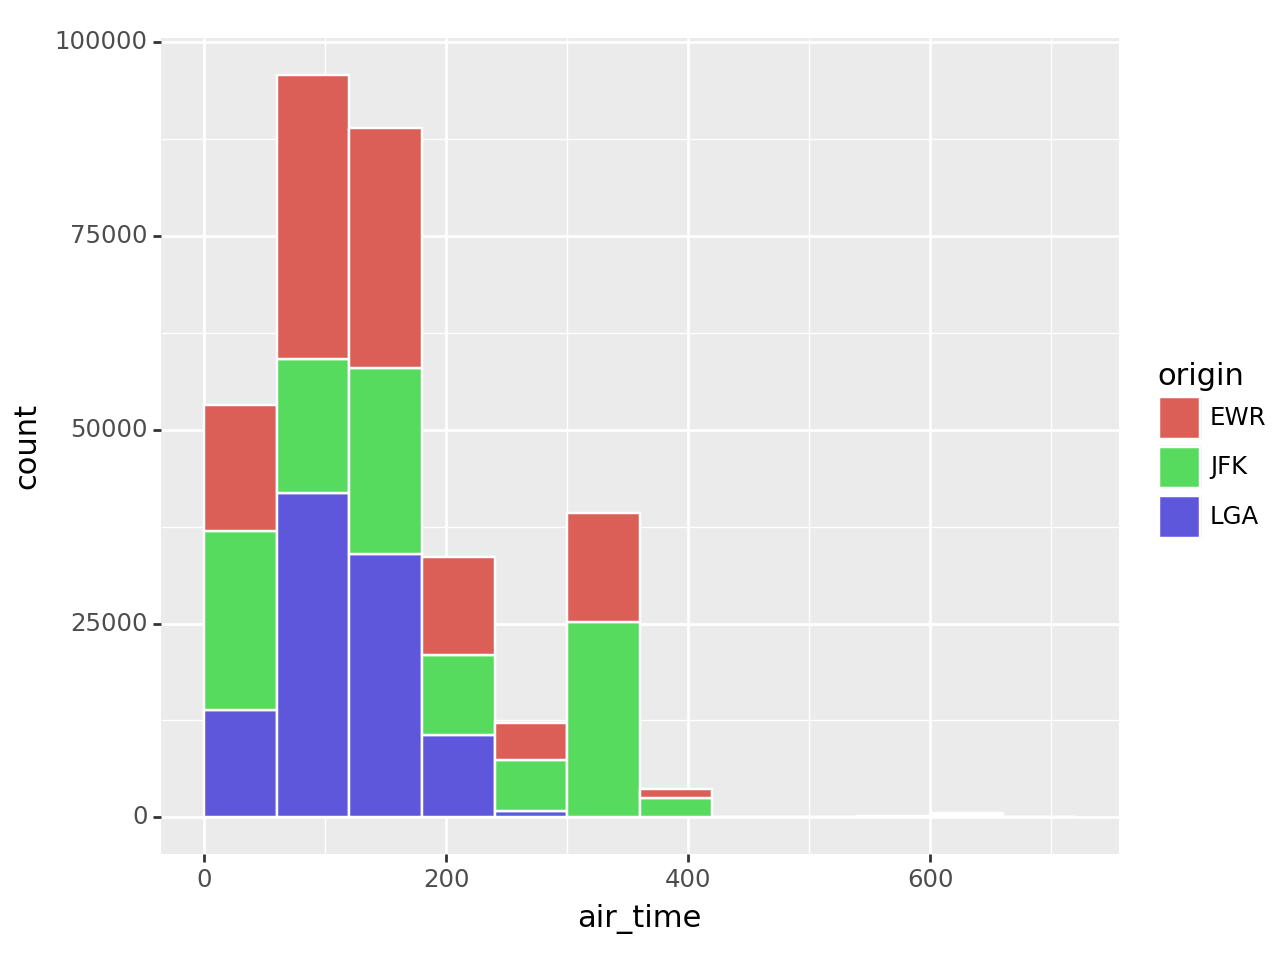

<Figure Size: (640 x 480)>

In [27]:
(
vuelos >> 
    filter(~_.air_time.isna()) >> 
    ggplot() + 
    geom_histogram(mapping=aes(x="air_time"),
                   breaks = intervalos,
                   color = "white")
)

## Ejercicio 2: Identificación de Retrasos Críticos en la Salida de Vuelos

El departamento de operaciones de un aeropuerto desea identificar los períodos del día en los que ocurren más retrasos en la salida de los vuelos (dep_delay). Este análisis es fundamental para mejorar la gestión del tráfico aéreo y minimizar los retrasos.

Visualiza la distribución de los retrasos en la salida de los vuelos para identificar cuándo ocurren con mayor frecuencia.

In [28]:
vuelos_retrasos = vuelos >> filter(~_.dep_delay.isna())

C:\Users\Usuario\anaconda3\Lib\site-packages\plotnine\stats\stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 2899'. Pick better value with 'binwidth'.


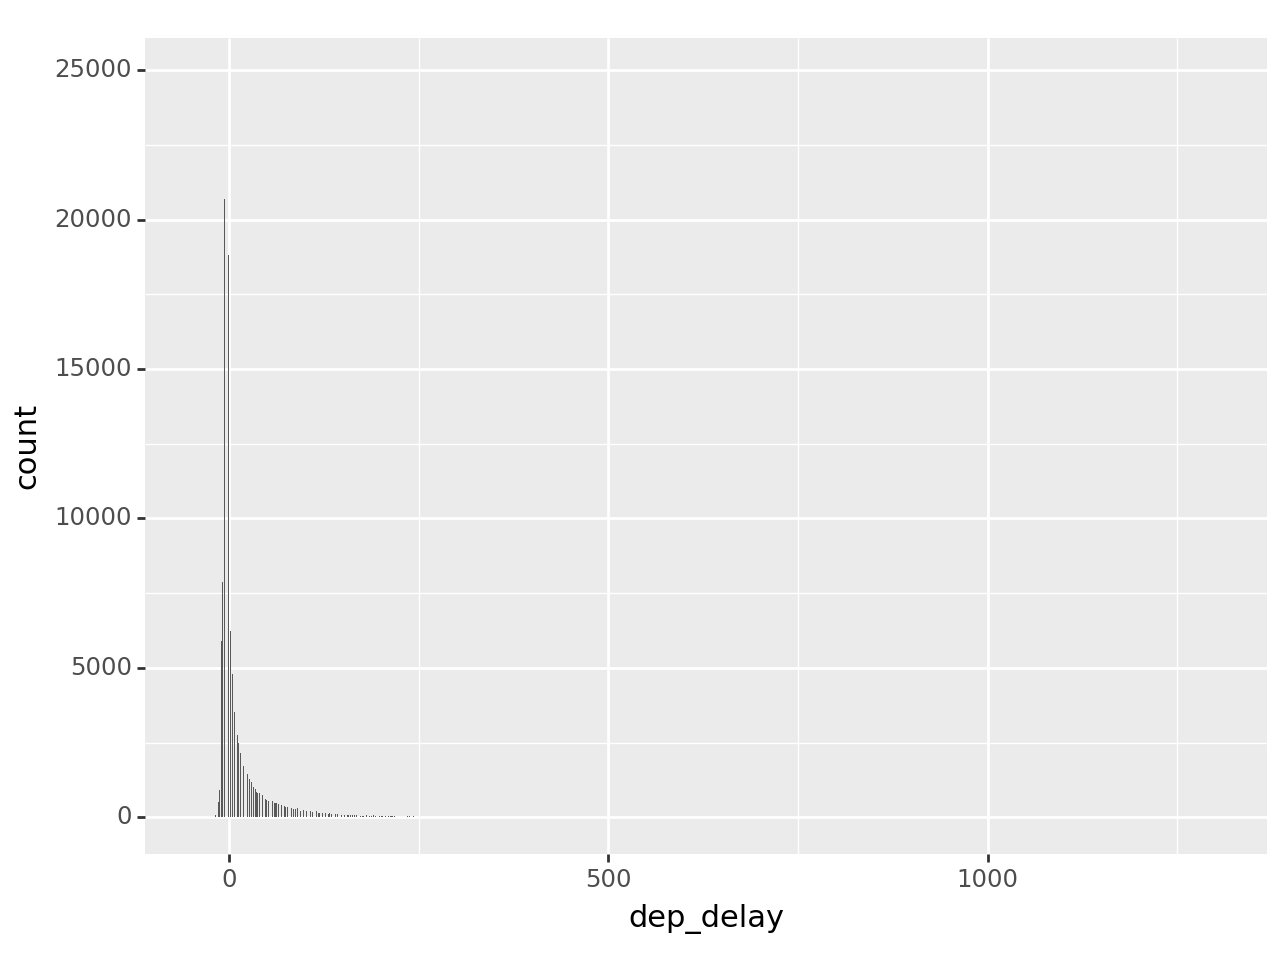

<Figure Size: (640 x 480)>

In [29]:
ggplot(vuelos_retrasos) + geom_histogram(mapping=aes(x="dep_delay"))

In [30]:
vuelos_retrasos >> summarize(retraso_minimo = _.dep_delay.min(), retraso_maximo = _.dep_delay.max())

,retraso_minimo,retraso_maximo
0,-43.0,1301.0


In [35]:
intervalos = np.arange(-10,121,10)
intervalos

array([-10,   0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110,
       120])

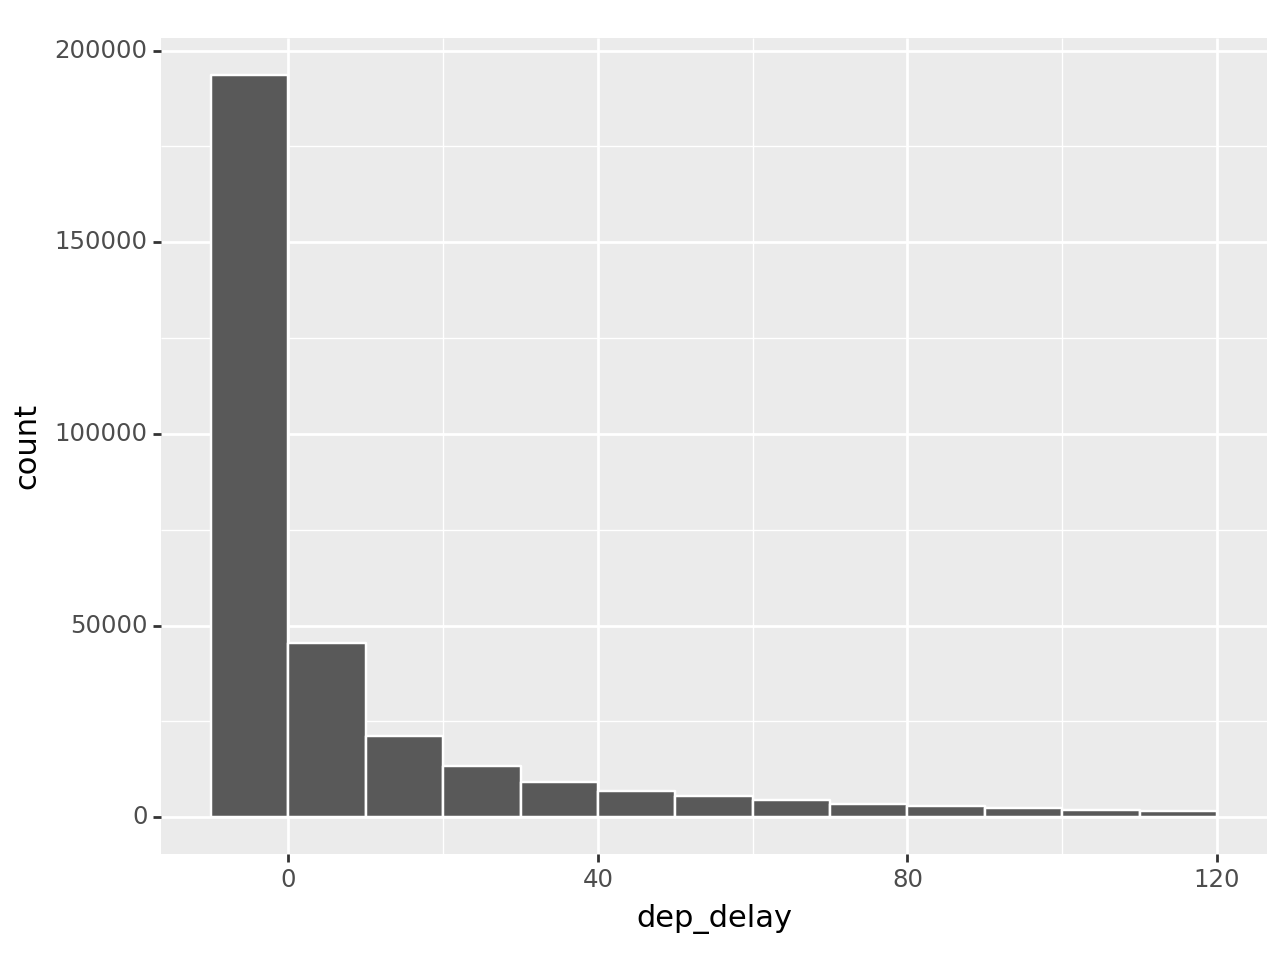

<Figure Size: (640 x 480)>

In [36]:
(
ggplot(data=vuelos_retrasos) + 
    geom_histogram(mapping=aes(x="dep_delay"),
                   breaks = intervalos,
                   color = "white")
)

## Ejercicio 3: Evaluación de la Cobertura de Rutas de Vuelo

Un analista de rutas de vuelo quiere evaluar qué tan lejos viajan los vuelos desde Nueva York. Este análisis permitirá a la aerolínea optimizar la asignación de aviones según las distancias recorridas.

Visualiza la distribución de la distancia recorrida por los vuelos.